In [0]:
from google.colab import files
uploaded = files.upload()

In [0]:
import pandas as pd
from collections import Counter


In [0]:
df = pd.read_csv('listings_summary.csv')

In [3]:
df.shape

(22552, 96)

In [0]:
df.head()

In [0]:
col = df.columns.sort_values()

In [6]:
col

Index(['access', 'accommodates', 'amenities', 'availability_30',
       'availability_365', 'availability_60', 'availability_90', 'bathrooms',
       'bed_type', 'bedrooms', 'beds', 'calculated_host_listings_count',
       'calendar_last_scraped', 'calendar_updated', 'cancellation_policy',
       'city', 'cleaning_fee', 'country', 'country_code', 'description',
       'experiences_offered', 'extra_people', 'first_review',
       'guests_included', 'has_availability', 'host_about',
       'host_acceptance_rate', 'host_has_profile_pic', 'host_id',
       'host_identity_verified', 'host_is_superhost', 'host_listings_count',
       'host_location', 'host_name', 'host_neighbourhood', 'host_picture_url',
       'host_response_rate', 'host_response_time', 'host_since',
       'host_thumbnail_url', 'host_total_listings_count', 'host_url',
       'host_verifications', 'house_rules', 'id', 'instant_bookable',
       'interaction', 'is_business_travel_ready', 'is_location_exact',
       'jurisdic

In [8]:
df['price'].describe()


count      22552
unique       295
top       $30.00
freq        1387
Name: price, dtype: object

In [9]:
df['amenities'].head()

0    {TV,"Cable TV",Wifi,Kitchen,Gym,Heating,"Famil...
1    {Wifi,Kitchen,Elevator,Heating,Washer,Essentia...
2    {Internet,Wifi,Kitchen,"Buzzer/wireless interc...
3    {Internet,Wifi,"Pets allowed","Pets live on th...
4    {Wifi,Heating,"Family/kid friendly",Essentials...
Name: amenities, dtype: object

In [10]:
results = Counter()
df['amenities'].str.strip('{}')\
               .str.replace('"', '')\
               .str.lstrip('\"')\
               .str.rstrip('\"')\
               .str.split(',')\
               .apply(results.update)

results.most_common(30)

[('Wifi', 21512),
 ('Kitchen', 21332),
 ('Heating', 21190),
 ('Essentials', 20329),
 ('Washer', 18497),
 ('Hair dryer', 14891),
 ('Laptop friendly workspace', 14447),
 ('Hangers', 13908),
 ('Iron', 11206),
 ('Shampoo', 10654),
 ('TV', 10134),
 ('Hot water', 9744),
 ('Family/kid friendly', 8141),
 ('Internet', 7909),
 ('Host greets you', 6663),
 ('Smoke detector', 6457),
 ('Buzzer/wireless intercom', 6116),
 ('Lock on bedroom door', 5294),
 ('Refrigerator', 5212),
 ('Free street parking', 5190),
 ('Dishes and silverware', 5082),
 ('Elevator', 4867),
 ('Bed linens', 4842),
 ('Cooking basics', 4834),
 ('Stove', 4816),
 ('Smoking allowed', 4589),
 ('Oven', 4312),
 ('translation missing: en.hosting_amenity_50', 4184),
 ('First aid kit', 4011),
 ('Cable TV', 3725)]

In [0]:
df_amenities = pd.DataFrame(results.most_common(30), columns=['amenity', 'count'])

In [13]:
df_amenities

,amenity,count
0,Wifi,21512
1,Kitchen,21332
2,Heating,21190
3,Essentials,20329
4,Washer,18497
5,Hair dryer,14891
6,Laptop friendly workspace,14447
7,Hangers,13908
8,Iron,11206
9,Shampoo,10654


In [0]:
df['Wifi'] = df['amenities'].str.contains('Wifi')
df['Laptop_friendly_workspace'] = df['amenities'].str.contains('Laptop friendly workspace')
df['TV'] = df['amenities'].str.contains('TV')
df['Family_kid_friendly'] = df['amenities'].str.contains('Family/kid friendly')
df['Host_greets_you'] = df['amenities'].str.contains('Host greets you')
df['Smoking_allowed'] = df['amenities'].str.contains('Smoking allowed')

In [0]:
col_keep = ['price','cleaning_fee','accommodates','minimum_nights','bedrooms','bathrooms',
            'neighbourhood_group_cleansed','room_type','description','extra_people',
            'Laptop_friendly_workspace','TV','Wifi','Family_kid_friendly','Host_greets_you','Smoking_allowed']

In [0]:
df_col = df[col_keep] 

In [47]:
df_col.shape

(22552, 16)

In [48]:
df_col.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 16 columns):
price                           22552 non-null object
cleaning_fee                    15406 non-null object
accommodates                    22552 non-null int64
minimum_nights                  22552 non-null int64
bedrooms                        22534 non-null float64
bathrooms                       22520 non-null float64
neighbourhood_group_cleansed    22552 non-null object
room_type                       22552 non-null object
description                     22349 non-null object
extra_people                    22552 non-null object
Laptop_friendly_workspace       22552 non-null bool
TV                              22552 non-null bool
Wifi                            22552 non-null bool
Family_kid_friendly             22552 non-null bool
Host_greets_you                 22552 non-null bool
Smoking_allowed                 22552 non-null bool
dtypes: bool(6), float64(2), int64(2), 

In [49]:
df_col[['price','cleaning_fee','extra_people']].head()

,price,cleaning_fee,extra_people
0,$60.00,$30.00,$28.00
1,$17.00,$0.00,$0.00
2,$90.00,$50.00,$20.00
3,$26.00,$30.00,$18.00
4,$42.00,$0.00,$24.00


In [50]:
df_col[['price','cleaning_fee','extra_people']].isnull().sum()

price              0
cleaning_fee    7146
extra_people       0
dtype: int64

replacing the null values to $0.00

In [51]:
df_col.cleaning_fee.fillna('$0.00', inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [52]:
df_col[['price','cleaning_fee','extra_people']].isnull().sum()

price           0
cleaning_fee    0
extra_people    0
dtype: int64

remove the dollar sign and commas, convert the string to float

In [53]:
df_col['price'] = df_col['price'].str.replace('$', '').str.replace(',', '').astype(float)
df_col['cleaning_fee'] = df_col['cleaning_fee'].str.replace('$', '').str.replace(',', '').astype(float)
df_col['extra_people'] = df_col['extra_people'].str.replace('$', '').str.replace(',', '').astype(float)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documenta

In [54]:
df_col[['price','cleaning_fee','extra_people']].dtypes

price           float64
cleaning_fee    float64
extra_people    float64
dtype: object

In [55]:
df_col.isnull().sum()

price                             0
cleaning_fee                      0
accommodates                      0
minimum_nights                    0
bedrooms                         18
bathrooms                        32
neighbourhood_group_cleansed      0
room_type                         0
description                     203
extra_people                      0
Laptop_friendly_workspace         0
TV                                0
Wifi                              0
Family_kid_friendly               0
Host_greets_you                   0
Smoking_allowed                   0
dtype: int64

In [56]:
df_col.dtypes

price                           float64
cleaning_fee                    float64
accommodates                      int64
minimum_nights                    int64
bedrooms                        float64
bathrooms                       float64
neighbourhood_group_cleansed     object
room_type                        object
description                      object
extra_people                    float64
Laptop_friendly_workspace          bool
TV                                 bool
Wifi                               bool
Family_kid_friendly                bool
Host_greets_you                    bool
Smoking_allowed                    bool
dtype: object

In [57]:
df_col.describe()

,price,cleaning_fee,accommodates,minimum_nights,bedrooms,bathrooms,extra_people
count,22552.000000,22552.000000,22552.000000,22552.000000,22534.000000,22520.000000,22552.000000
mean,67.143668,18.253991,2.637460,7.157059,1.161134,1.092695,8.257716
std,220.266210,28.172816,1.510548,40.665073,0.646156,0.329894,11.151069
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,45.000000,10.000000,2.000000,2.000000,1.000000,1.000000,5.000000
75%,70.000000,30.000000,3.000000,4.000000,1.000000,1.000000,15.000000
max,9000.000000,2000.000000,16.000000,5000.000000,12.000000,8.500000,250.000000


In [58]:
df_col.describe(exclude='number')

,neighbourhood_group_cleansed,room_type,description,Laptop_friendly_workspace,TV,Wifi,Family_kid_friendly,Host_greets_you,Smoking_allowed
count,22552,22552,22349,22552,22552,22552,22552,22552,22552
unique,12,3,21997,2,2,2,2,2,2
top,Friedrichshain-Kreuzberg,Private room,We are located in one of the most colorful dis...,True,False,True,False,False,False
freq,5497,11534,12,14447,12297,21512,14411,15889,17963


In [59]:
df_col.shape

(22552, 16)

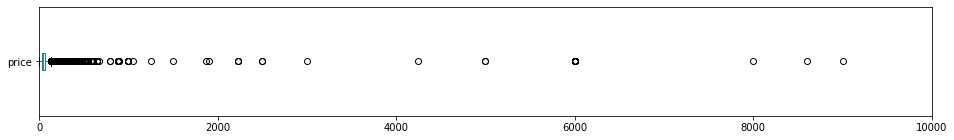

In [60]:
df_col['price'].plot(kind='box', xlim=(0, 10000), vert=False,  figsize=(16,2));

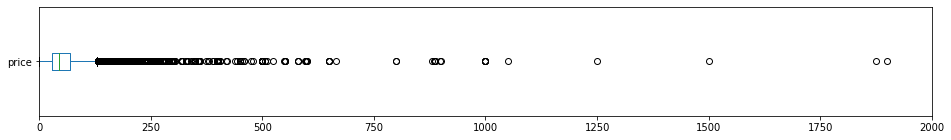

In [61]:
df_col['price'].plot(kind='box', xlim=(0, 2000), vert=False,  figsize=(16,2));

In [0]:
df_wo_ol = df_col[(df_col['price'] > 7 )& (df_raw['price'] <= 750)]

In [65]:
df_col.shape,df_wo_ol.shape

((22552, 16), (22492, 16))

In [66]:
df_wo_ol.describe()

,price,cleaning_fee,accommodates,minimum_nights,bedrooms,bathrooms,extra_people
count,22492.000000,22492.000000,22492.000000,22492.000000,22474.000000,22460.000000,22492.000000
mean,58.656545,18.165748,2.632758,7.165614,1.159473,1.091741,8.264272
std,47.727855,24.808675,1.490482,40.713285,0.639009,0.325615,11.143833
min,8.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,1.000000,1.000000,0.000000
50%,45.000000,10.000000,2.000000,2.000000,1.000000,1.000000,5.000000
75%,70.000000,30.000000,3.000000,4.000000,1.000000,1.000000,15.000000
max,666.000000,450.000000,16.000000,5000.000000,10.000000,8.500000,250.000000


In [67]:
df_wo_ol.isnull().sum()

price                             0
cleaning_fee                      0
accommodates                      0
minimum_nights                    0
bedrooms                         18
bathrooms                        32
neighbourhood_group_cleansed      0
room_type                         0
description                     202
extra_people                      0
Laptop_friendly_workspace         0
TV                                0
Wifi                              0
Family_kid_friendly               0
Host_greets_you                   0
Smoking_allowed                   0
dtype: int64

In [0]:
df_clean = df_wo_ol.dropna()

In [69]:
df_clean.isnull().sum()

price                           0
cleaning_fee                    0
accommodates                    0
minimum_nights                  0
bedrooms                        0
bathrooms                       0
neighbourhood_group_cleansed    0
room_type                       0
description                     0
extra_people                    0
Laptop_friendly_workspace       0
TV                              0
Wifi                            0
Family_kid_friendly             0
Host_greets_you                 0
Smoking_allowed                 0
dtype: int64

In [70]:
df_clean.describe(exclude='number')

,neighbourhood_group_cleansed,room_type,description,Laptop_friendly_workspace,TV,Wifi,Family_kid_friendly,Host_greets_you,Smoking_allowed
count,22240,22240,22240,22240,22240,22240,22240,22240,22240
unique,12,3,21901,2,2,2,2,2,2
top,Friedrichshain-Kreuzberg,Private room,We are located in one of the most colorful dis...,True,False,True,False,False,False
freq,5440,11362,12,14280,12150,21227,14132,15635,17722


In [71]:
df_clean.shape

(22240, 16)

In [0]:
df_clean.to_csv('airbnb.csv')

In [73]:
df_clean.head()

,price,cleaning_fee,accommodates,minimum_nights,bedrooms,bathrooms,neighbourhood_group_cleansed,room_type,description,extra_people,Laptop_friendly_workspace,TV,Wifi,Family_kid_friendly,Host_greets_you,Smoking_allowed
0,60.0,30.0,3,4,1.0,1.0,Mitte,Entire home/apt,Great location! 30 of 75 sq meters. This wood...,28.0,True,True,True,True,False,False
1,17.0,0.0,2,2,1.0,1.0,Pankow,Private room,In the summertime we are spending most of our ...,0.0,True,False,True,False,False,False
2,90.0,50.0,4,62,1.0,1.0,Pankow,Entire home/apt,This beautiful first floor apartment is situa...,20.0,True,False,True,True,False,False
3,26.0,30.0,2,5,1.0,1.0,Tempelhof - Schöneberg,Private room,First of all: I prefer short-notice bookings. ...,18.0,True,False,True,False,True,False
4,42.0,0.0,2,2,1.0,1.0,Pankow,Private room,Cozy and large room in the beautiful district ...,24.0,True,False,True,True,False,False


In [74]:
df_clean.dtypes

price                           float64
cleaning_fee                    float64
accommodates                      int64
minimum_nights                    int64
bedrooms                        float64
bathrooms                       float64
neighbourhood_group_cleansed     object
room_type                        object
description                      object
extra_people                    float64
Laptop_friendly_workspace          bool
TV                                 bool
Wifi                               bool
Family_kid_friendly                bool
Host_greets_you                    bool
Smoking_allowed                    bool
dtype: object